In [3]:
!pip install deap
import csv
import pickle
import os
import codecs

import numpy as np

from urllib.request import urlopen

import matplotlib.pyplot as plt

# classe que retorna a distância euclidiana
class TravelingSalesmanProblem:
    """This class encapsulates the Traveling Salesman Problem.
    City coordinates are read from an online file and distance matrix is calculated.
    The data is serialized to disk.
    The total distance can be calculated for a path represented by a list of city indices.
    A plot can be created for a path represented by a list of city indices.
    :param name: The name of the corresponding TSPLIB problem, e.g. 'burma14' or 'bayg29'.
    """

    def __init__(self, name):
        """
        Creates an instance of a TSP
        :param name: name of the TSP problem
        """

        # initialize instance variables:
        self.name = name
        self.locations = []
        self.distances = []
        self.tspSize = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        returns the length of the underlying TSP
        :return: the length of the underlying TSP (number of cities)
        """
        return self.tspSize

    def __initData(self):
        """Reads the serialized data, and if not available - calls __create_data() to prepare it
        """

        # attempt to read serialized data:
        try:
            self.locations = pickle.load(open(os.path.join("tsp-data", self.name + "-loc.pickle"), "rb"))
            self.distances = pickle.load(open(os.path.join("tsp-data", self.name + "-dist.pickle"), "rb"))
        except (OSError, IOError):
            pass

        # serailized data not found - create the data from scratch:
        if not self.locations or not self.distances:
            self.__createData()

        # set the problem 'size':
        self.tspSize = len(self.locations)

    def __createData(self):
        """Reads the desired TSP file from the Internet, extracts the city coordinates, calculates the distances
        between every two cities and uses them to populate a distance matrix (two-dimensional array).
        It then serializes the city locations and the calculated distances to disk using the pickle utility.
        """
        self.locations = []

        # open whitespace-delimited file from url and read lines from it:
        with urlopen("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/" + self.name + ".tsp") as f:
            reader = csv.reader(codecs.iterdecode(f, 'utf-8'), delimiter=" ", skipinitialspace=True)

            # skip lines until one of these lines is found:
            for row in reader:
                if row[0] in ('DISPLAY_DATA_SECTION', 'NODE_COORD_SECTION'):
                    break

            # read data lines until 'EOF' found:
            for row in reader:
                if row[0] != 'EOF':
                    # remove index at beginning of line:
                    del row[0]

                    # convert x,y coordinates to ndarray:
                    self.locations.append(np.asarray(row, dtype=np.float32))
                else:
                    break

            # set the problem 'size':
            self.tspSize = len(self.locations)

            # print data:
            print("length = {}, locations = {}".format(self.tspSize, self.locations))

            # initialize distance matrix by filling it with 0's:
            self.distances = [[0] * self.tspSize for _ in range(self.tspSize)]

            # populate the distance matrix with calculated distances:
            for i in range(self.tspSize):
                for j in range(i + 1, self.tspSize):
                    # calculate euclidean distance between two ndarrays:
                    distance = np.linalg.norm(self.locations[j] - self.locations[i])
                    self.distances[i][j] = distance
                    self.distances[j][i] = distance
                    print("{}, {}: location1 = {}, location2 = {} => distance = {}".format(i, j, self.locations[i], self.locations[j], distance))

            # serialize locations and distances:
            if not os.path.exists("tsp-data"):
                os.makedirs("tsp-data")
            pickle.dump(self.locations, open(os.path.join("tsp-data", self.name + "-loc.pickle"), "wb"))
            pickle.dump(self.distances, open(os.path.join("tsp-data", self.name + "-dist.pickle"), "wb"))

    def getTotalDistance(self, indices):
        """Calculates the total distance of the path described by the given indices of the cities
        :param indices: A list of ordered city indices describing the given path.
        :return: total distance of the path described by the given indices
        """
        # distance between th elast and first city:
        distance = self.distances[indices[-1]][indices[0]]

        # add the distance between each pair of consequtive cities:
        for i in range(len(indices) - 1):
            distance += self.distances[indices[i]][indices[i + 1]]

        return distance

    def plotData(self, indices):
        """plots the path described by the given indices of the cities
        :param indices: A list of ordered city indices describing the given path.
        :return: the resulting plot
        """

        # plot the dots representing the cities:
        plt.scatter(*zip(*self.locations), marker='.', color='red')

        # create a list of the corresponding city locations:
        locs = [self.locations[i] for i in indices]
        locs.append(locs[0])

        # plot a line between each pair of consequtive cities:
        plt.plot(*zip(*locs), linestyle='-', color='blue')

        return plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 13.7 MB/s 


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	min    	avg  
0  	300   	21103.3	26457
1  	279   	19562.4	25128.9
2  	275   	19456.5	24267.3
3  	279   	19760.9	23592  
4  	278   	19406.4	22963.5
5  	276   	19105.2	22480.7
6  	281   	17802.4	22129.9
7  	279   	18160.2	21581.5
8  	274   	17691.3	21253.6
9  	277   	16011.9	20877.8
10 	268   	16011.9	20597.9
11 	279   	15878.8	20413.2
12 	269   	14589.1	20188.2
13 	272   	14589.1	19987.8
14 	281   	15182.9	19910.4
15 	276   	15836.2	19437  
16 	276   	15687.4	19117.2
17 	282   	15426.5	19039.4
18 	282   	14905.2	18696.7
19 	269   	15020.4	18614.9
20 	275   	13346.3	18424  
21 	276   	14711.4	18330.1
22 	275   	13139.1	18312  
23 	274   	13139.1	18005  
24 	278   	13002.5	17725.6
25 	262   	12203.5	17543.2
26 	274   	13157.3	17285.2
27 	260   	12918.6	16946.3
28 	271   	12918.6	16646  
29 	262   	12918.6	16441  
30 	279   	12652.9	16194.2
31 	265   	12652.9	15910.6
32 	278   	12565.6	15942.4
33 	278   	12520.5	15682  
34 	283   	12436.1	15569.5
35 	272   	12214  	15441.9
36 	2

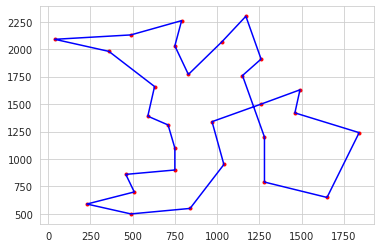

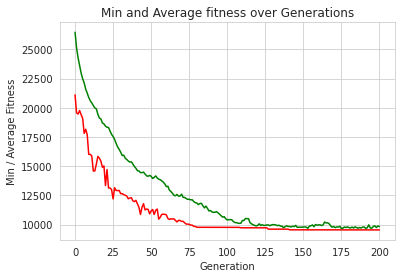

In [7]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

TSP_NAME = "bayg29"  # nome do arquivo
tsp = TravelingSalesmanProblem(TSP_NAME)

# Parâmetros do AG
POPULATION_SIZE = 300
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 1
P_CROSSOVER = 0.9 
P_MUTATION = 0.1  

toolbox = base.Toolbox()

# define a estratégia de fitness
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# cria uma classe Individuo representada por inteiros
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# cria um operador que gera randomicamente os indices
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

# cria um operador de criação de individuos para preencher com os indices
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# cria o operador de criação de população que gera uma lista de individuos
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# função de fitness - calcula a distancia total da lista de cidades representadas por indices
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # returna a tupla

toolbox.register("evaluate", tpsDistance)

# registra os operadores genéticos
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))


# Fluxo do AG
def main():

    # cria a população inicial (geração 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepara as estatísticas
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # executa o AG com suas características
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # imprime o melhor indivíduo
    best = hof.items[0]
    print("-- Melhor indivíduo = ", best)
    print("-- Melhor Fitness = ", best.fitness.values[0])

    # plota a melhor solução
    plt.figure(1)
    tsp.plotData(best)

    # plota as estatísticas
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()


if __name__ == "__main__":
    main()